**TEAM 1 (this is not the final data analysis!! Just a prototype)**

# **Data Preprocessing and Cleaning for survey 1**

In [ ]:
# Importations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 200
%matplotlib inline
from matplotlib.pyplot import figure as fig
from collections import Counter

In [ ]:
df = pd.read_csv('Sleeping quality.csv') #read the data frame

In [ ]:
df.reset_index().rename(columns={'index': 'User ID'}).set_index("User ID", 
                                                                inplace = True) #add an index column 


In [ ]:
#Clean the data frame by removing the useless column
# df = df.drop('Username',1).drop('Timestamp',1)
df = df.drop('Timestamp',1)

In [ ]:
df.head(2) #how our final data frame looks like

,Username,Were you in France during lockdowns? / Étiez-vous en France pendant le confinement ?,Are you following courses in France? / Suivez-vous vos cours en France ?,Your current student status / Votre niveau d'étude actuel,Are you a CRI student? / Etes-vous étudiant au CRI ?,Your age / Votre âge,To which gender do you identify? / A quel genre vous identifiez-vous ?,Are you living alone? / Vivez-vous seul ?,Do you have a pet living with you? / Vivez-vous avec un animal de compagnie ?,How many hours do you spend outdoors daily? (average) / Combien de temps passez-vous à l'extérieur par jour (en moyenne) ?,"How many times per week you get to meet some friends/family/colleagues not currently living with you? (average) / Combien de fois par semaine voyez-vous des amis, de la famille ou des collègues qui n'habitent pas actuellement avec vous ?","How many hours do you spend daily in front of a screen (TV, PC, phone...) (average)? / Combien d'heures passez-vous chaque jour devant un écran (télévision, ordinateur, téléphone... (en moyenne) ?","On average, when do you go to bed? / En moyenne, à quelle heure vous couchez-vous ?","On average, when do you wake up? / En moyenne, à quelle heure vous réveillez-vous ?","On average and during the last week, how often have you felt stressed out? / En moyenne, combien de fois vous êtes-vous sentis stressés cette semaine ?","On average, how many times do you wake up while sleeping every night? / En moyenne, à quelle fréquence vous réveillez-vous la nuit ?","On average, how long does it take to fall asleep? / En général, combien de temps mettez-vous à vous endormir ?",Agreement for data collection and further participation / Accord pour la collecte de donnée et participation à l'enquête
0,michael.rera@cri-paris.org,Yes / Oui,Yes / Oui,PhD / Doctorat,No / Non,>30,Male / Homme,Yes / Oui,No / Non,3,4,10,00:00,08:30,Everyday / Tous les jours,1,30 min to 1h / De 30 minutes à 1h,I agree to share these data / J'accepte de par...
1,yasamin.nematollahi@cri-paris.org,Iran,Yes / Oui,Master,Yes / Oui,28 - 30,Female / Femme,Yes / Oui,No / Non,7,4,4,00:00,08:00,A few times (once or twice) / Quelques fois (u...,1,15 to 30 min / De 15 à 30 minutes,I agree to share these data / J'accepte de par...


In [ ]:
# Let's check the data we are manipulating 
# display(final_df.dtypes)
# display(final_df.info)
# display(final_df.describe)
# display(final_df.columns)

In [ ]:
#For the categorical columns of the dataset we want to see how many instances of each category there are
# display(final_df.iloc[:, :8].value_counts())
# display(final_df.iloc[:, 11:14].value_counts())
# display(final_df.iloc[:, -1:].value_counts())

In [ ]:
list_col = df.columns.tolist()
list_col

['Username',
 'Were you in France during lockdowns? / Étiez-vous en France pendant le confinement ?',
 'Are you following courses in France? / Suivez-vous vos cours en France ?',
 "Your current student status / Votre niveau d'étude actuel",
 'Are you a CRI student? / Etes-vous étudiant au CRI ?',
 'Your age / Votre âge',
 'To which gender do you identify? / A quel genre vous identifiez-vous ?',
 'Are you living alone? / Vivez-vous seul ?',
 'Do you have a pet living with you? / Vivez-vous avec un animal de compagnie ?',
 "How many hours do you spend outdoors daily? (average) / Combien de temps passez-vous à l'extérieur par jour (en moyenne) ?",
 "How many times per week you get to meet some friends/family/colleagues not currently living with you? (average) / Combien de fois par semaine voyez-vous des amis, de la famille ou des collègues qui n'habitent pas actuellement avec vous ? ",
 "How many hours do you spend daily in front of a screen (TV, PC, phone...) (average)? / Combien d'heure

In [ ]:
# Rename columns names for clearer/easy data wrangling

column_name = ["email",'in_france','courses_in_france','status','cri_student', 'age', 
                'gender', 'alone','have_pet', 'time_outside','meeting_friends', 'screen_time', 'time_to_bed',
               'wake_time', 'stress_level', 'wake_sleep_time','time_fall_asleep', 'agreement' ]


res = {list_col[i]: column_name[i] for i in range(len(list_col))} 
df = df.rename(columns=res)

In [ ]:
df = df[(df["agreement"] == "I agree to share these data / J'accepte de partager ces données;I agree to receive and participate to the upcoming weekly surveys (3) during December / J'accepte de recevoir et de participer aux trois enquêtes à venir pendant le mois de décembre") | (df["agreement"] == "I agree to receive and participate to the upcoming weekly surveys (3) during December / J'accepte de recevoir et de participer aux trois enquêtes à venir pendant le mois de décembre")]
df = df[(df["in_france"] == "Yes / Oui")]
df = df[(df["courses_in_france"] == "Yes / Oui") & (df["courses_in_france"]== "Yes / Oui")]
len(df)

24

In [ ]:
df.columns

Index(['email', 'in_france', 'courses_in_france', 'status', 'cri_student',
       'age', 'gender', 'alone', 'have_pet', 'time_outside', 'meeting_friends',
       'screen_time', 'time_to_bed', 'wake_time', 'stress_level',
       'wake_sleep_time', 'time_fall_asleep', 'agreement'],
      dtype='object')

In [ ]:
df = df.drop("agreement",1)
df

,email,in_france,courses_in_france,status,cri_student,age,gender,alone,have_pet,time_outside,meeting_friends,screen_time,time_to_bed,wake_time,stress_level,wake_sleep_time,time_fall_asleep
3,lorenzocolombo1998@gmail.com,Yes / Oui,Yes / Oui,Master,No / Non,23 - 27,Male / Homme,No / Non,No / Non,10,3,6,23:30,07:30,Everyday / Tous les jours,1,15 to 30 min / De 15 à 30 minutes
4,fannylemant@yahoo.fr,Yes / Oui,Yes / Oui,Master,No / Non,18 - 22,Female / Femme,No / Non,"Yes and it doesn't require to go out / Oui, un...",15,6,3,00:00,07:00,A few times (once or twice) / Quelques fois (u...,1,Instantly - less than 15 min / Instantanément ...
5,marie.gareau99@gmail.com,Yes / Oui,Yes / Oui,Bachelor / Licence,No / Non,18 - 22,Female / Femme,No / Non,No / Non,2,7,4,23:30,07:00,A few times (once or twice) / Quelques fois (u...,0,Instantly - less than 15 min / Instantanément ...
6,nathan.finance@hotmail.fr,Yes / Oui,Yes / Oui,Master,No / Non,18 - 22,Male / Homme,Yes / Oui,No / Non,10,7,10,12:30,07:00,Often (three or four times) / Souvent (trois o...,2,Instantly - less than 15 min / Instantanément ...
8,alexandre@glastra.fr,Yes / Oui,Yes / Oui,Master,No / Non,18 - 22,Male / Homme,No / Non,No / Non,6,1,5,00:30,06:30,A few times (once or twice) / Quelques fois (u...,0,15 to 30 min / De 15 à 30 minutes
9,prashamsakc2.0@gmail.com,Yes / Oui,Yes / Oui,Bachelor / Licence,No / Non,18 - 22,Female / Femme,No / Non,No / Non,10,4,5,00:00,09:00,A few times (once or twice) / Quelques fois (u...,1,More than 1h / Plus d'1h
10,delphine.ly99@gmail.com,Yes / Oui,Yes / Oui,Master,No / Non,18 - 22,Female / Femme,No / Non,No / Non,1,1,8,22:45,07:00,A few times (once or twice) / Quelques fois (u...,0,Instantly - less than 15 min / Instantanément ...
11,tania.tyczynski@gmail.com,Yes / Oui,Yes / Oui,Bachelor / Licence,No / Non,18 - 22,Female / Femme,Yes / Oui,No / Non,8,7,2,00:45,07:30,Often (three or four times) / Souvent (trois o...,0,Instantly - less than 15 min / Instantanément ...
14,angele.payan@yahoo.com,Yes / Oui,Yes / Oui,Bachelor / Licence,No / Non,18 - 22,Female / Femme,No / Non,Yes and it requires to go out (e.g. dog) / Oui...,1,1,9,23:00,07:30,Everyday / Tous les jours,0,15 to 30 min / De 15 à 30 minutes
16,valentine.brasseur4@gmail.com,Yes / Oui,Yes / Oui,Master,No / Non,18 - 22,Female / Femme,Yes / Oui,No / Non,1,7,9,01:15,07:30,Often (three or four times) / Souvent (trois o...,0,15 to 30 min / De 15 à 30 minutes


# **Data Preprocessing and Cleaning survey 2**

In [ ]:
df2 = pd.read_csv('Sleeping quality 2.csv') #read the data frame
df2.head(2)

,Timestamp,Username,"DAILY - How many hours did you spend in front of a screen (TV, PC, phone...)? / Combien d'heures avez-vous passé chaque jour devant un écran (télévision, ordinateur, téléphone... (en moyenne) ?","On average, when did you go to bed? / En moyenne, à quelle heure vous êtes-vous couché.e ?","On average, when did you wake up? / En moyenne, à quelle heure vous êtes-vous réveillé.e?","On average and during the last week, how often have you felt stressed out? / En moyenne, combien de fois vous êtes-vous sentis stressé.e cette semaine ?","On average, how many times did you wake up while sleeping every night? / En moyenne, à quelle fréquence vous êtes-vous réveillé.e la nuit ?","On average, how long did it take to fall asleep? / En moyenne, combien de temps avez-vous mis à vous endormir ?"
0,2021/12/06 12:03:50 PM GMT+1,valentine.brasseur4@gmail.com,9,01:00,08:30,A few times (once or twice),0,15 to 30 min
1,2021/12/06 12:05:13 PM GMT+1,cindyevellyn@gmail.com,7,23:30,07:00,Everyday,0,15 to 30 min


In [ ]:
df2.reset_index().rename(columns={'index': 'User ID'}).set_index("User ID", 
                                                                inplace = True) #add an index column 


In [ ]:
#Clean the data frame by removing the useless column
# df2 = df2.drop('Username',1).drop('Timestamp',1)
df2 = df2.drop('Timestamp',1)

In [ ]:
df2.head(2) #how our final data frame looks like

,Username,"DAILY - How many hours did you spend in front of a screen (TV, PC, phone...)? / Combien d'heures avez-vous passé chaque jour devant un écran (télévision, ordinateur, téléphone... (en moyenne) ?","On average, when did you go to bed? / En moyenne, à quelle heure vous êtes-vous couché.e ?","On average, when did you wake up? / En moyenne, à quelle heure vous êtes-vous réveillé.e?","On average and during the last week, how often have you felt stressed out? / En moyenne, combien de fois vous êtes-vous sentis stressé.e cette semaine ?","On average, how many times did you wake up while sleeping every night? / En moyenne, à quelle fréquence vous êtes-vous réveillé.e la nuit ?","On average, how long did it take to fall asleep? / En moyenne, combien de temps avez-vous mis à vous endormir ?"
0,valentine.brasseur4@gmail.com,9,01:00,08:30,A few times (once or twice),0,15 to 30 min
1,cindyevellyn@gmail.com,7,23:30,07:00,Everyday,0,15 to 30 min


In [ ]:
# Let's check the data we are manipulating 
# display(final_df2.dtypes)
# display(final_df2.info)
# display(final_df2.describe)
# display(final_df2.columns)

In [ ]:
#For the categorical columns of the dataset we want to see how many instances of each category there are
# display(final_df2.iloc[:, :8].value_counts())
# display(final_df2.iloc[:, 11:14].value_counts())
# display(final_df2.iloc[:, -1:].value_counts())

In [ ]:
list_col2 = df2.columns.tolist()
list_col2

['Username',
 "DAILY - How many hours did you spend in front of a screen (TV, PC, phone...)? / Combien d'heures avez-vous passé chaque jour devant un écran (télévision, ordinateur, téléphone... (en moyenne) ?",
 'On average, when did you go to bed? / En moyenne, à quelle heure vous êtes-vous couché.e ?',
 'On average, when did you wake up? / En moyenne, à quelle heure vous êtes-vous réveillé.e?',
 'On average and during the last week, how often have you felt stressed out? / En moyenne, combien de fois vous êtes-vous sentis stressé.e cette semaine ?',
 'On average, how many times did you wake up while sleeping every night? / En moyenne, à quelle fréquence vous êtes-vous réveillé.e la nuit ? ',
 'On average, how long did it take to fall asleep? / En moyenne, combien de temps avez-vous mis à vous endormir ?']

In [ ]:
# Rename columns names for clearer/easy data wrangling

column_name2 = ["email",'screen_time', 'time_to_bed',
               'wake_time', 'stress_level', 'wake_sleep_time','time_fall_asleep']


res2 = {list_col2[i]: column_name2[i] for i in range(len(list_col2))} 
df2 = df2.rename(columns=res2)

In [ ]:
len(df2)

16

In [ ]:
df2.columns
df2

,email,screen_time,time_to_bed,wake_time,stress_level,wake_sleep_time,time_fall_asleep
0,valentine.brasseur4@gmail.com,9,01:00,08:30,A few times (once or twice),0,15 to 30 min
1,cindyevellyn@gmail.com,7,23:30,07:00,Everyday,0,15 to 30 min
2,samantha.hurtado@cri-paris.org,4,23:50,07:50,A few times (once or twice),1,More than 1h
3,lorenzocolombo1998@gmail.com,8,23:30,07:30,Often (three or four times),1,15 to 30 min
4,wilschneider07@gmail.com,4,01:30,09:00,A few times (once or twice),0,Instantly - less than 15 min
5,tania.tyczynski@gmail.com,9,01:30,09:30,A few times (once or twice),0,Instantly - less than 15 min
6,hippolyte.aubertin@cri-paris.org,8,00:00,07:30,Never,1,15 to 30 min
7,mariatou.drame@cri-paris.org,8,01:00,08:00,Everyday,2,Instantly - less than 15 min
8,delphine.ly99@gmail.com,8,00:30,08:00,Often (three or four times),2,15 to 30 min
9,lisha.ling@cri-paris.org,6,01:30,09:30,Often (three or four times),1,30 min to 1h


# **Checks**

In [ ]:
email_week1 = df["email"].tolist()  
email_week2 = df2["email"].tolist()
email_week1 = [each_string.lower() for each_string in email_week1]
email_week2 = [each_string.lower() for each_string in email_week2]
checkslist = email_week1 + email_week2
for i in checkslist:
  if checkslist.count(i) != 2:
    checkslist.remove(i)
checkslist

['lorenzocolombo1998@gmail.com',
 'marie.gareau99@gmail.com',
 'alexandre@glastra.fr',
 'delphine.ly99@gmail.com',
 'tania.tyczynski@gmail.com',
 'valentine.brasseur4@gmail.com',
 'carla.tousmayol@cri-paris.org',
 'nssaveleva@mail.ru',
 'wilschneider07@gmail.com',
 'lisha.ling@cri-paris.org',
 'hippolyte.aubertin@cri-paris.org',
 'camille.masanet@cri-paris.org',
 'mariana.anaya@cri-paris.org',
 'laurine.lachkar@cri-paris.org',
 'mariatou.drame@cri-paris.org',
 'samantha.hurtado@cri-paris.org',
 'valentine.brasseur4@gmail.com',
 'samantha.hurtado@cri-paris.org',
 'lorenzocolombo1998@gmail.com',
 'wilschneider07@gmail.com',
 'tania.tyczynski@gmail.com',
 'hippolyte.aubertin@cri-paris.org',
 'mariatou.drame@cri-paris.org',
 'delphine.ly99@gmail.com',
 'lisha.ling@cri-paris.org',
 'nssaveleva@mail.ru',
 'mariana.anaya@cri-paris.org',
 'laurine.lachkar@cri-paris.org',
 'camille.masanet@cri-paris.org']

# **Sleep Quality**

In [ ]:
# # For main survey sleeping quality score.
# def f_sleep_hour(datafr):
#     datafr['time_to_bed']= datafr['time_to_bed'].astype('datetime64[ns]').format(time.hour, time.minute)
#     datafr['wake_time']= datafr['time_to_bed'].astype('datetime64[ns]').format(time.hour, time.minute)
#     datafr['hours_of_sleep'] =  datafr['wake_time']- datafr['time_to_bed'] 
#     # df['Date'] = df['Date'].astype('datetime64[ns]')

In [ ]:
# f_sleep_hour(df)


In [ ]:
df.head(2)

,email,in_france,courses_in_france,status,cri_student,age,gender,alone,have_pet,time_outside,meeting_friends,screen_time,time_to_bed,wake_time,stress_level,wake_sleep_time,time_fall_asleep
3,lorenzocolombo1998@gmail.com,Yes / Oui,Yes / Oui,Master,No / Non,23 - 27,Male / Homme,No / Non,No / Non,10,3,6,23:30,07:30,Everyday / Tous les jours,1,15 to 30 min / De 15 à 30 minutes
4,fannylemant@yahoo.fr,Yes / Oui,Yes / Oui,Master,No / Non,18 - 22,Female / Femme,No / Non,"Yes and it doesn't require to go out / Oui, un...",15,6,3,00:00,07:00,A few times (once or twice) / Quelques fois (u...,1,Instantly - less than 15 min / Instantanément ...


In [ ]:
df['sleeping_quality_score'] = 0
for index, row in df.iterrows():
    if row['time_fall_asleep'] == '15 to 30 min / De 15 à 30 minutes':
        row['sleeping_quality_score'] += 1
        df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']
    elif  row['time_fall_asleep'] == '30 min to 1h / De 30 minutes à 1h':
        row['sleeping_quality_score'] += 2
        df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']
    elif  row['time_fall_asleep'] == "More than 1h / Plus d'1h":
        row['sleeping_quality_score'] += 3
        df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']
        
    # if row['hours_of_sleep']<7 and row['hours_of_sleep']>=6 :
    #     row['sleeping_quality_score'] += 1
    #     df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']
    # elif row['hours_of_sleep']<6 and row['hours_of_sleep']>=5 :
    #     row['sleeping_quality_score'] += 2
    #     df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']
    # elif row['hours_of_sleep']<5 :
    #     row['sleeping_quality_score'] += 3
    #     df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']

    # if row['times_of_wake']==2:
    #     row['sleeping_quality_score'] += 1
    #     df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']
    # elif row['times_of_wake']==3:
    #     row['sleeping_quality_score'] += 2
    #     df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']
    # elif row['times_of_wake']>=4:
    #     row['sleeping_quality_score'] += 3
    #     df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']

In [ ]:
df['sleeping_quality_score'].head()

3    1
4    0
5    0
6    0
8    1
Name: sleeping_quality_score, dtype: int64

# **Assigning score to the sleep pramateres (Weekly Surveys)**

In [ ]:
def get_sleeping_quality_score(df):

    df['sleeping_quality_score'] = 0
    for index, row in df.iterrows():
        if row['time_fall_asleep'] == '15 to 30 min':
            row['sleeping_quality_score'] += 1
            df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']
        elif  row['time_fall_asleep'] == '30 min to 1h':
            row['sleeping_quality_score'] += 2
            df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']
        elif  row['time_fall_asleep'] == "More than 1h":
            row['sleeping_quality_score'] += 3
            df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']
            
        # if row['hours_of_sleep']<7 and row['hours_of_sleep']>=6 :
        #     row['sleeping_quality_score'] += 1
        #     df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']
        # elif row['hours_of_sleep']<6 and row['hours_of_sleep']>=5 :
        #     row['sleeping_quality_score'] += 2
        #     df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']
        # elif row['hours_of_sleep']<5 :
        #     row['sleeping_quality_score'] += 3
        #     df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']

        # if row['times_of_wake']==2:
        #     row['sleeping_quality_score'] += 1
        #     df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']
        # elif row['times_of_wake']==3:
        #     row['sleeping_quality_score'] += 2
        #     df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']
        # elif row['times_of_wake']>=4:
        #     row['sleeping_quality_score'] += 3
        #     df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']

# **Data Visualizations and Explanations**

In [ ]:
# Bar Plot Fucntion
def ratio(column,color):
    print('Percentage Ratio:')
    print(df[column].value_counts(normalize=True) * 100)
    gen = df[column].value_counts().plot(kind='bar',color= color, alpha=0.6)
    gen.set_ylabel('Participant Count')
    gen.set_title(column.capitalize()+' Ratio')
    plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)

In [ ]:
def ratio_pie(column):
    gen = df[column].value_counts().plot(kind='pie',y = column.capitalize(),autopct='%1.1f%%',fontsize=12,wedgeprops={'alpha':0.7},legend = False)
    plt.show()

> **Question 1** : general

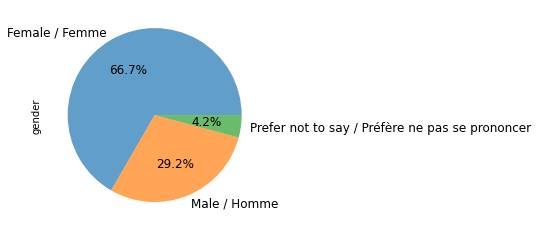

In [ ]:
ratio_pie('gender')

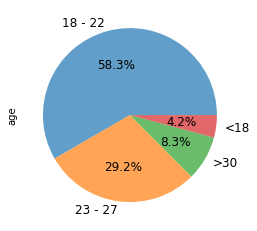

In [ ]:
ratio_pie('age')

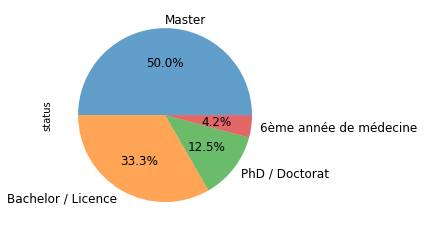

In [ ]:
ratio_pie('status')

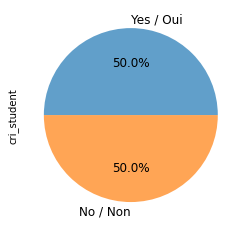

In [ ]:
ratio_pie('cri_student')

Percentage Ratio:
Female / Femme                                     66.666667
Male / Homme                                       29.166667
Prefer not to say / Préfère ne pas se prononcer     4.166667
Name: gender, dtype: float64


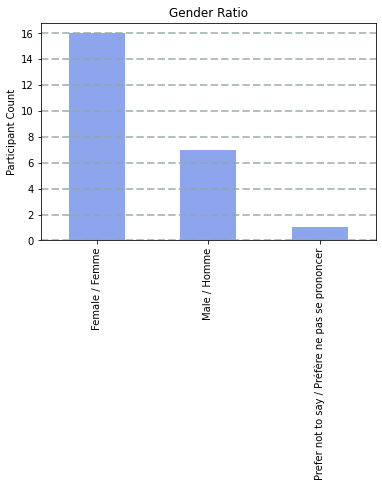

In [ ]:
ratio('gender','royalblue')

Percentage Ratio:
Master                    50.000000
Bachelor / Licence        33.333333
PhD / Doctorat            12.500000
6ème année de médecine     4.166667
Name: status, dtype: float64


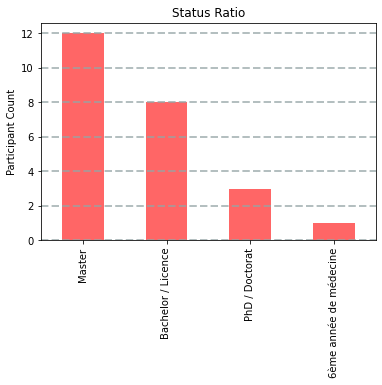

In [ ]:
ratio('status','red')

Percentage Ratio:
Yes / Oui    50.0
No / Non     50.0
Name: cri_student, dtype: float64


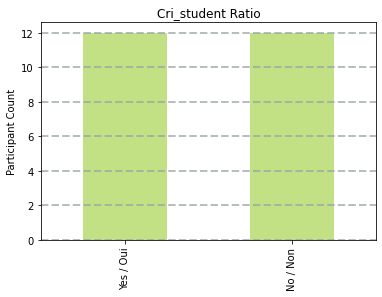

In [ ]:
ratio('cri_student','yellowgreen')

Percentage Ratio:
18 - 22    58.333333
23 - 27    29.166667
>30         8.333333
<18         4.166667
Name: age, dtype: float64


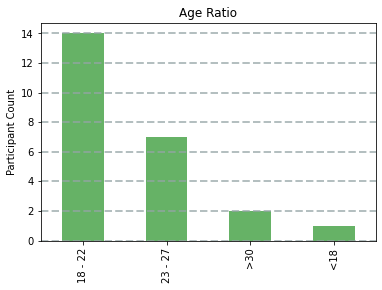

In [ ]:
ratio('age','green')

> **Question 2** : What is the average sleep quality score of those who are exposed to daily stress?

In [ ]:
df.sort_index(inplace=True)

In [ ]:
df['avg_score'] = df['sleeping_quality_score']/1

In [ ]:
s_avg_score = df.loc[df['stress_level']== 'Everyday / Tous les jours']

In [ ]:
sq_with_stress = round(s_avg_score['avg_score'].mean())


In [ ]:
perc_st = 100-(((sq_with_stress/9)*100))
print('Sleeping quality averege percentage who got stress everyday: %'+ str(perc_st) )

Sleeping quality averege percentage who got stress everyday: %88.88888888888889


Question3 : What is the distribution of average sleeping quality score(%)?

In [ ]:
df['avg_score_perc'] = 100-((df['avg_score']/9)*100)
df['avg_score_perc'].head()

3     88.888889
4    100.000000
5    100.000000
6    100.000000
8     88.888889
Name: avg_score_perc, dtype: float64

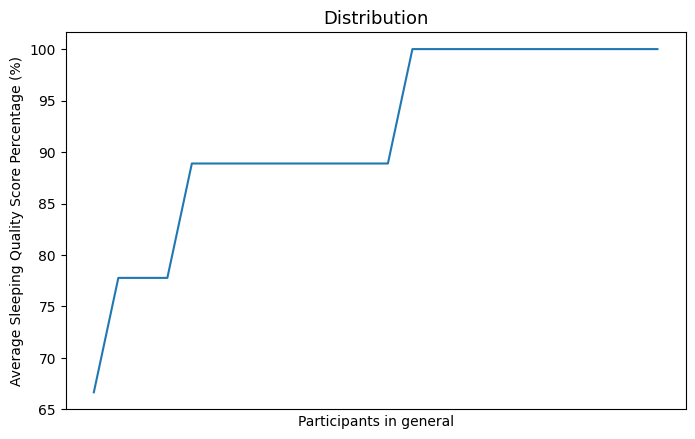

In [ ]:
plt.figure(figsize=(8,5), dpi = 100)
plt.xlabel('Participants in general', fontsize = 10)
plt.ylabel('Average Sleeping Quality Score Percentage (%)', fontsize=10)
plt.title('Distribution', fontsize=13)
plt.plot(sorted(df['avg_score_perc']))
plt.xticks([])
plt.show()

In [ ]:
df.drop(df.index[df['status'] == '6ème année de médecine'], inplace = True)


Question 4 : What is the corrolation between parameters and sleeping quality?

In [ ]:
# To not change our intial data set  which is all string and orginal we will copy our dataset for chnage numerical values
df_numeric =  df.copy()
df_numeric

,email,in_france,courses_in_france,status,cri_student,age,gender,alone,have_pet,time_outside,meeting_friends,screen_time,time_to_bed,wake_time,stress_level,wake_sleep_time,time_fall_asleep,sleeping_quality_score,avg_score,avg_score_perc
3,lorenzocolombo1998@gmail.com,Yes / Oui,Yes / Oui,Master,No / Non,23 - 27,Male / Homme,No / Non,No / Non,10,3,6,23:30,07:30,Everyday / Tous les jours,1,15 to 30 min / De 15 à 30 minutes,1,1.0,88.888889
4,fannylemant@yahoo.fr,Yes / Oui,Yes / Oui,Master,No / Non,18 - 22,Female / Femme,No / Non,"Yes and it doesn't require to go out / Oui, un...",15,6,3,00:00,07:00,A few times (once or twice) / Quelques fois (u...,1,Instantly - less than 15 min / Instantanément ...,0,0.0,100.000000
5,marie.gareau99@gmail.com,Yes / Oui,Yes / Oui,Bachelor / Licence,No / Non,18 - 22,Female / Femme,No / Non,No / Non,2,7,4,23:30,07:00,A few times (once or twice) / Quelques fois (u...,0,Instantly - less than 15 min / Instantanément ...,0,0.0,100.000000
6,nathan.finance@hotmail.fr,Yes / Oui,Yes / Oui,Master,No / Non,18 - 22,Male / Homme,Yes / Oui,No / Non,10,7,10,12:30,07:00,Often (three or four times) / Souvent (trois o...,2,Instantly - less than 15 min / Instantanément ...,0,0.0,100.000000
8,alexandre@glastra.fr,Yes / Oui,Yes / Oui,Master,No / Non,18 - 22,Male / Homme,No / Non,No / Non,6,1,5,00:30,06:30,A few times (once or twice) / Quelques fois (u...,0,15 to 30 min / De 15 à 30 minutes,1,1.0,88.888889
9,prashamsakc2.0@gmail.com,Yes / Oui,Yes / Oui,Bachelor / Licence,No / Non,18 - 22,Female / Femme,No / Non,No / Non,10,4,5,00:00,09:00,A few times (once or twice) / Quelques fois (u...,1,More than 1h / Plus d'1h,3,3.0,66.666667
10,delphine.ly99@gmail.com,Yes / Oui,Yes / Oui,Master,No / Non,18 - 22,Female / Femme,No / Non,No / Non,1,1,8,22:45,07:00,A few times (once or twice) / Quelques fois (u...,0,Instantly - less than 15 min / Instantanément ...,0,0.0,100.000000
11,tania.tyczynski@gmail.com,Yes / Oui,Yes / Oui,Bachelor / Licence,No / Non,18 - 22,Female / Femme,Yes / Oui,No / Non,8,7,2,00:45,07:30,Often (three or four times) / Souvent (trois o...,0,Instantly - less than 15 min / Instantanément ...,0,0.0,100.000000
14,angele.payan@yahoo.com,Yes / Oui,Yes / Oui,Bachelor / Licence,No / Non,18 - 22,Female / Femme,No / Non,Yes and it requires to go out (e.g. dog) / Oui...,1,1,9,23:00,07:30,Everyday / Tous les jours,0,15 to 30 min / De 15 à 30 minutes,1,1.0,88.888889
16,valentine.brasseur4@gmail.com,Yes / Oui,Yes / Oui,Master,No / Non,18 - 22,Female / Femme,Yes / Oui,No / Non,1,7,9,01:15,07:30,Often (three or four times) / Souvent (trois o...,0,15 to 30 min / De 15 à 30 minutes,1,1.0,88.888889


In [ ]:
# Looking age column unique values 
df_numeric['age'].unique()

array(['23 - 27', '18 - 22', '>30', '<18'], dtype=object)

In [ ]:
#Changing values to numerical for better analyze
df_numeric.loc[ df_numeric['age'] == '<18', 'age'] = 0
df_numeric.loc[ df_numeric['age'] == '18 - 22', 'age'] = 1
df_numeric.loc[ df_numeric['age'] == '23 - 27', 'age'] = 2
df_numeric.loc[ df_numeric['age'] == '28 - 30', 'age'] = 3
df_numeric.loc[ df_numeric['age'] == '>30', 'age'] = 4
df_numeric.age = df_numeric.age.astype(int) 

In [ ]:
df_numeric.head()

,email,in_france,courses_in_france,status,cri_student,age,gender,alone,have_pet,time_outside,meeting_friends,screen_time,time_to_bed,wake_time,stress_level,wake_sleep_time,time_fall_asleep,sleeping_quality_score,avg_score,avg_score_perc
3,lorenzocolombo1998@gmail.com,Yes / Oui,Yes / Oui,Master,No / Non,2,Male / Homme,No / Non,No / Non,10,3,6,23:30,07:30,Everyday / Tous les jours,1,15 to 30 min / De 15 à 30 minutes,1,1.0,88.888889
4,fannylemant@yahoo.fr,Yes / Oui,Yes / Oui,Master,No / Non,1,Female / Femme,No / Non,"Yes and it doesn't require to go out / Oui, un...",15,6,3,00:00,07:00,A few times (once or twice) / Quelques fois (u...,1,Instantly - less than 15 min / Instantanément ...,0,0.0,100.000000
5,marie.gareau99@gmail.com,Yes / Oui,Yes / Oui,Bachelor / Licence,No / Non,1,Female / Femme,No / Non,No / Non,2,7,4,23:30,07:00,A few times (once or twice) / Quelques fois (u...,0,Instantly - less than 15 min / Instantanément ...,0,0.0,100.000000
6,nathan.finance@hotmail.fr,Yes / Oui,Yes / Oui,Master,No / Non,1,Male / Homme,Yes / Oui,No / Non,10,7,10,12:30,07:00,Often (three or four times) / Souvent (trois o...,2,Instantly - less than 15 min / Instantanément ...,0,0.0,100.000000
8,alexandre@glastra.fr,Yes / Oui,Yes / Oui,Master,No / Non,1,Male / Homme,No / Non,No / Non,6,1,5,00:30,06:30,A few times (once or twice) / Quelques fois (u...,0,15 to 30 min / De 15 à 30 minutes,1,1.0,88.888889


In [ ]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 3 to 51
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   email                   23 non-null     object 
 1   in_france               23 non-null     object 
 2   courses_in_france       23 non-null     object 
 3   status                  23 non-null     object 
 4   cri_student             23 non-null     object 
 5   age                     23 non-null     int64  
 6   gender                  23 non-null     object 
 7   alone                   23 non-null     object 
 8   have_pet                23 non-null     object 
 9   time_outside            23 non-null     int64  
 10  meeting_friends         23 non-null     int64  
 11  screen_time             23 non-null     int64  
 12  time_to_bed             23 non-null     object 
 13  wake_time               23 non-null     object 
 14  stress_level            23 non-null     obje

In [ ]:
# We did age column into the numeric values. Now we will go on with gender
df_numeric.loc[ df_numeric['gender'] == 'Female / Femme','gender'] = 0
df_numeric.loc[ df_numeric['gender'] == 'Male / Homme','gender'] = 1
df_numeric.loc[ df_numeric['gender'] == 'Prefer not to say / Préfère ne pas se prononcer', 'gender'] = 2
df_numeric.gender = df_numeric.gender.astype(int) 

In [ ]:
# education_level
df_numeric['status'].unique()
df

,email,in_france,courses_in_france,status,cri_student,age,gender,alone,have_pet,time_outside,meeting_friends,screen_time,time_to_bed,wake_time,stress_level,wake_sleep_time,time_fall_asleep,sleeping_quality_score,avg_score,avg_score_perc
3,lorenzocolombo1998@gmail.com,Yes / Oui,Yes / Oui,Master,No / Non,23 - 27,Male / Homme,No / Non,No / Non,10,3,6,23:30,07:30,Everyday / Tous les jours,1,15 to 30 min / De 15 à 30 minutes,1,1.0,88.888889
4,fannylemant@yahoo.fr,Yes / Oui,Yes / Oui,Master,No / Non,18 - 22,Female / Femme,No / Non,"Yes and it doesn't require to go out / Oui, un...",15,6,3,00:00,07:00,A few times (once or twice) / Quelques fois (u...,1,Instantly - less than 15 min / Instantanément ...,0,0.0,100.000000
5,marie.gareau99@gmail.com,Yes / Oui,Yes / Oui,Bachelor / Licence,No / Non,18 - 22,Female / Femme,No / Non,No / Non,2,7,4,23:30,07:00,A few times (once or twice) / Quelques fois (u...,0,Instantly - less than 15 min / Instantanément ...,0,0.0,100.000000
6,nathan.finance@hotmail.fr,Yes / Oui,Yes / Oui,Master,No / Non,18 - 22,Male / Homme,Yes / Oui,No / Non,10,7,10,12:30,07:00,Often (three or four times) / Souvent (trois o...,2,Instantly - less than 15 min / Instantanément ...,0,0.0,100.000000
8,alexandre@glastra.fr,Yes / Oui,Yes / Oui,Master,No / Non,18 - 22,Male / Homme,No / Non,No / Non,6,1,5,00:30,06:30,A few times (once or twice) / Quelques fois (u...,0,15 to 30 min / De 15 à 30 minutes,1,1.0,88.888889
9,prashamsakc2.0@gmail.com,Yes / Oui,Yes / Oui,Bachelor / Licence,No / Non,18 - 22,Female / Femme,No / Non,No / Non,10,4,5,00:00,09:00,A few times (once or twice) / Quelques fois (u...,1,More than 1h / Plus d'1h,3,3.0,66.666667
10,delphine.ly99@gmail.com,Yes / Oui,Yes / Oui,Master,No / Non,18 - 22,Female / Femme,No / Non,No / Non,1,1,8,22:45,07:00,A few times (once or twice) / Quelques fois (u...,0,Instantly - less than 15 min / Instantanément ...,0,0.0,100.000000
11,tania.tyczynski@gmail.com,Yes / Oui,Yes / Oui,Bachelor / Licence,No / Non,18 - 22,Female / Femme,Yes / Oui,No / Non,8,7,2,00:45,07:30,Often (three or four times) / Souvent (trois o...,0,Instantly - less than 15 min / Instantanément ...,0,0.0,100.000000
14,angele.payan@yahoo.com,Yes / Oui,Yes / Oui,Bachelor / Licence,No / Non,18 - 22,Female / Femme,No / Non,Yes and it requires to go out (e.g. dog) / Oui...,1,1,9,23:00,07:30,Everyday / Tous les jours,0,15 to 30 min / De 15 à 30 minutes,1,1.0,88.888889
16,valentine.brasseur4@gmail.com,Yes / Oui,Yes / Oui,Master,No / Non,18 - 22,Female / Femme,Yes / Oui,No / Non,1,7,9,01:15,07:30,Often (three or four times) / Souvent (trois o...,0,15 to 30 min / De 15 à 30 minutes,1,1.0,88.888889


In [ ]:
df_numeric.loc[ df_numeric['status'] == 'Master','status'] = 0
df_numeric.loc[ df_numeric['status'] == 'PhD / Doctorat','status'] = 1
df_numeric.loc[ df_numeric['status'] == 'Postdoc', 'status'] = 2
df_numeric.loc[ df_numeric['status'] == 'Bachelor / Licence', 'status'] = 3
df_numeric.status = df_numeric.status.astype(int) 

In [ ]:
# cri_student
df_numeric['cri_student'].unique()

array(['No / Non', 'Yes / Oui'], dtype=object)

In [ ]:
df_numeric.loc[ df_numeric['cri_student'] == 'No','cri_student'] = 0
df_numeric.loc[ df_numeric['cri_student'] == 'Yes','cri_student'] = 1
df_numeric.status = df_numeric.status.astype(int) 

In [ ]:
df_numeric['alone'].unique()


array(['No / Non', 'Yes / Oui'], dtype=object)

In [ ]:
df_numeric.loc[ df_numeric['alone'] == 'No / Non','alone'] = 0
df_numeric.loc[ df_numeric['alone'] == 'Yes / Oui','alone'] = 1
df_numeric.loc[ df_numeric['alone'] == "Student Residence (I guess that's no)",'alone'] = 2
df_numeric.loc[ df_numeric['alone'] == 'En résidence universitaire','alone'] = 3
df_numeric.loc[ df_numeric['alone'] == 'Residence','alone'] = 4
df_numeric.alone = df_numeric.alone.astype(int)

In [ ]:
df_numeric['have_pet'].unique()

array(['No / Non',
       "Yes and it doesn't require to go out / Oui, un animal qui ne nécessite pas de sortir",
       'Yes and it requires to go out (e.g. dog) / Oui, un animal qui nécessite de sortir (comme un chien)'],
      dtype=object)

In [ ]:
df_numeric.loc[ df_numeric['have_pet'] == 'No / Non','have_pet'] = 0
df_numeric.loc[ df_numeric['have_pet'] == "Yes and it doesn't require to go out / Oui, un animal qui ne nécessite pas de sortir",'have_pet'] = 1
df_numeric.loc[ df_numeric['have_pet'] == 'Yes and it requires to go out (e.g. dog) / Oui, un animal qui nécessite de sortir (comme un chien)','have_pet'] = 2
df_numeric.have_pet = df_numeric.have_pet.astype(int)

In [ ]:
df_numeric['stress_level'].unique()

array(['Everyday / Tous les jours',
       'A few times (once or twice) / Quelques fois (une fois ou deux)',
       'Often (three or four times) / Souvent (trois ou quatre fois)',
       'Never / Jamais'], dtype=object)

In [ ]:
df_numeric.loc[ df_numeric['stress_level'] == 'Often (three or four times) / Souvent (trois ou quatre fois)','stress_level'] = 0
df_numeric.loc[ df_numeric['stress_level'] == 'Never / Jamais','stress_level'] = 1
df_numeric.loc[ df_numeric['stress_level'] == 'A few times (once or twice) / Quelques fois (une fois ou deux)','stress_level'] = 2
df_numeric.loc[ df_numeric['stress_level'] == 'Everyday / Tous les jours','stress_level'] = 3
df_numeric.stress_level = df_numeric.stress_level.astype(int)

In [ ]:
df_numeric['in_france'].unique()

array(['Yes / Oui'], dtype=object)

In [ ]:
df_numeric.loc[ df_numeric['in_france'] == 'Yes / Oui','in_france'] = 0
df_numeric.loc[ df_numeric['in_france'] == 'Moved in France from Japan on November 29','in_france'] = 1
df_numeric.loc[ df_numeric['in_france'] == 'Italy','in_france'] = 1
df_numeric.in_france = df_numeric.in_france.astype(int)

In [ ]:
df_numeric['time_fall_asleep'].unique()


array(['15 to 30 min / De 15 à 30 minutes',
       'Instantly - less than 15 min / Instantanément - moins de 15 minutes',
       "More than 1h / Plus d'1h", '30 min to 1h / De 30 minutes à 1h'],
      dtype=object)

In [ ]:
df_numeric.loc[ df_numeric['time_fall_asleep'] == 'Instantly - less than 15 min / Instantanément - moins de 15 minutes','time_fall_asleep'] = 0
df_numeric.loc[ df_numeric['time_fall_asleep'] == "More than 1h / Plus d'1h",'time_fall_asleep'] = 1
df_numeric.loc[ df_numeric['time_fall_asleep'] == '30 min to 1h / De 30 minutes à 1h' ,'time_fall_asleep'] = 2
df_numeric.loc[ df_numeric['time_fall_asleep'] == '15 to 30 min / De 15 à 30 minutes' ,'time_fall_asleep'] = 3
df_numeric.time_fall_asleep = df_numeric.time_fall_asleep.astype(int)

Creating Social Factor Score

In [ ]:
df_numeric['socialization_factor'] = 0
for index, row in df_numeric.iterrows():
    if row['alone'] == 1:
        row['socialization_factor'] += 1
        df_numeric.at[index,'socialization_factor'] = row['socialization_factor']
    if row['have_pet'] == 1 or row['have_pet'] == 2 :
        row['socialization_factor'] += 1
        df_numeric.at[index,'socialization_factor'] = row['socialization_factor']
    if row['meeting_friends'] > 2:
        row['socialization_factor'] += 1
        df_numeric.at[index,'socialization_factor'] = row['socialization_factor'] 

In [ ]:
df_num_new = df_numeric.copy()
df_num_new = df_num_new.drop(['wake_time','avg_score_perc','sleeping_quality_score','gender','status','cri_student','alone','have_pet', 'meeting_friends', 'in_france'],axis = 1)

In [ ]:
print(df_num_new)

                               email courses_in_france  age  time_outside  \
3       lorenzocolombo1998@gmail.com         Yes / Oui    2            10   
4               fannylemant@yahoo.fr         Yes / Oui    1            15   
5           marie.gareau99@gmail.com         Yes / Oui    1             2   
6          nathan.finance@hotmail.fr         Yes / Oui    1            10   
8               alexandre@glastra.fr         Yes / Oui    1             6   
9           prashamsakc2.0@gmail.com         Yes / Oui    1            10   
10           delphine.ly99@gmail.com         Yes / Oui    1             1   
11         tania.tyczynski@gmail.com         Yes / Oui    1             8   
14            angele.payan@yahoo.com         Yes / Oui    1             1   
16     valentine.brasseur4@gmail.com         Yes / Oui    1             1   
19               tjf200094@gmail.com         Yes / Oui    1             6   
21     carla.tousmayol@cri-paris.org         Yes / Oui    2             9   

Text(0.5, 1.0, 'Correlation')

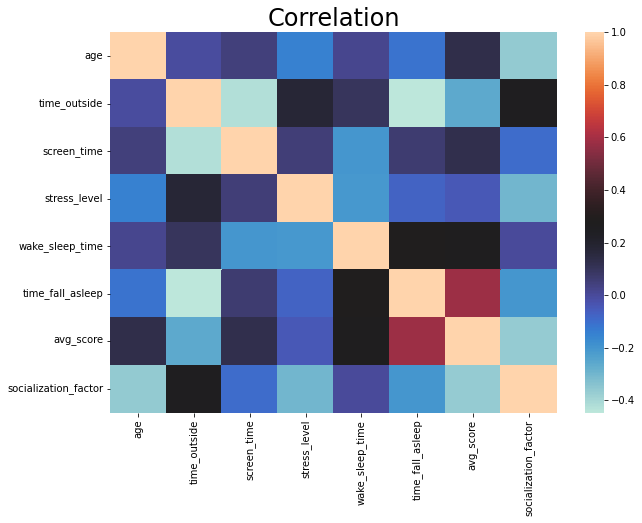

In [ ]:
fig, ax = plt.subplots(figsize=(10,7)) 

sns.heatmap(df_num_new.corr(), cmap='icefire',ax=ax)
plt.title('Correlation', fontsize=24)

In [ ]:
# print("Corrlation values with average of sleeping quality score")
# df_num_new.drop("avg_score", axis=1).apply(lambda x: x.corr(df_num_new.avg_score))

Corrlation values with average of sleeping quality score


TypeError: ignored

In [ ]:
# df_compare = df[['sleeping_quality_score']].copy()
# df_compare.reset_index(inplace = True) 
# df_compare['week']= 'week0'
# add_1 = df[['week1_score']].copy()
# add_1 = add_1.rename(columns={'week1_score':'sleeping_quality_score'})
# add_1['week']= 'week1'
# add_1.reset_index(inplace = True) 
# add_2 = df[['week2_score']].copy()
# add_2['week']= 'week2'
# add_2 = add_2.rename(columns={'week2_score':'sleeping_quality_score'})
# add_2.reset_index(inplace = True) 
# add_3 = df[['week3_score']].copy()
# add_3['week']= 'week3'
# add_3 = add_3.rename(columns={'week3_score':'sleeping_quality_score'})
# add_3.reset_index(inplace = True) 

In [ ]:
df_numeric.head()

,email,in_france,courses_in_france,status,cri_student,age,gender,alone,have_pet,time_outside,meeting_friends,screen_time,time_to_bed,wake_time,stress_level,wake_sleep_time,time_fall_asleep,sleeping_quality_score,avg_score,avg_score_perc,socialization_factor
3,lorenzocolombo1998@gmail.com,0,Yes / Oui,0,No / Non,2,1,0,0,10,3,6,23:30,07:30,3,1,3,1,1.0,88.888889,1
4,fannylemant@yahoo.fr,0,Yes / Oui,0,No / Non,1,0,0,1,15,6,3,00:00,07:00,2,1,0,0,0.0,100.000000,2
5,marie.gareau99@gmail.com,0,Yes / Oui,3,No / Non,1,0,0,0,2,7,4,23:30,07:00,2,0,0,0,0.0,100.000000,1
6,nathan.finance@hotmail.fr,0,Yes / Oui,0,No / Non,1,1,1,0,10,7,10,12:30,07:00,0,2,0,0,0.0,100.000000,2
8,alexandre@glastra.fr,0,Yes / Oui,0,No / Non,1,1,0,0,6,1,5,00:30,06:30,2,0,3,1,1.0,88.888889,0


In [ ]:
# sns.jointplot(x = "avg_score", y = "times_of_wake", data = df_numeric, kind = "reg");

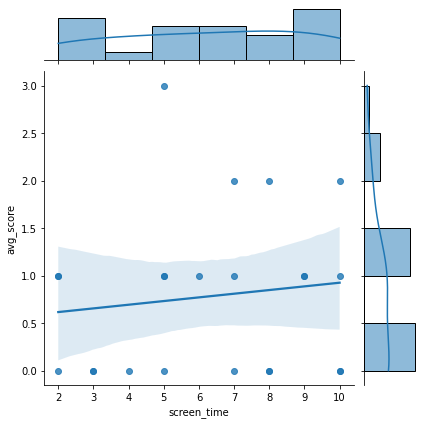

In [ ]:
sns.jointplot(x = "screen_time", y = "avg_score", data = df_numeric, kind = "reg");

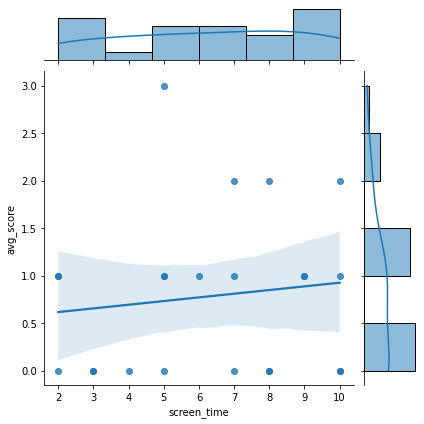

In [ ]:
sns.jointplot(x = "screen_time", y = "avg_score", data = df_numeric, kind = "reg");

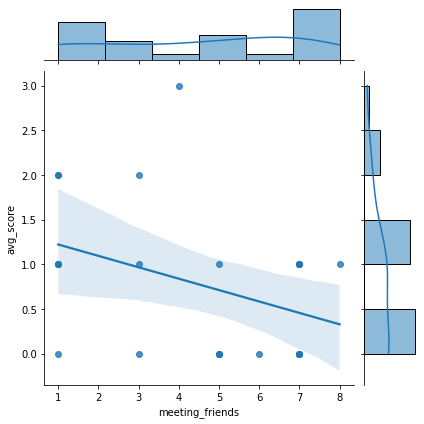

In [ ]:
sns.jointplot(x = "meeting_friends", y = "avg_score", data = df_numeric, kind = "reg");

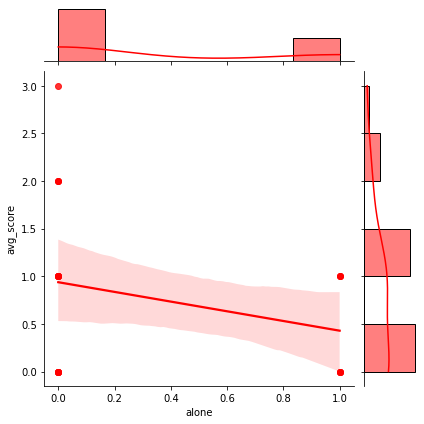

In [ ]:
sns.jointplot(x = "alone", y = "avg_score", data = df_numeric, kind = "reg",color="red");


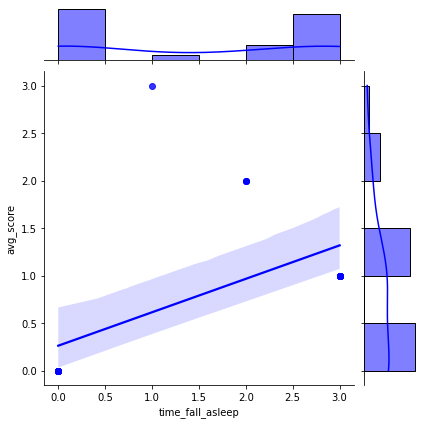

In [ ]:
sns.jointplot(x = "time_fall_asleep", y = "avg_score", data = df_numeric, kind = "reg",color="blue");


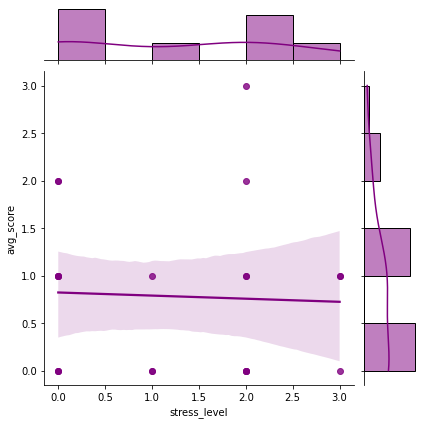

In [ ]:
sns.jointplot(x = "stress_level", y = "avg_score", data = df_numeric, kind = "reg",color="purple");

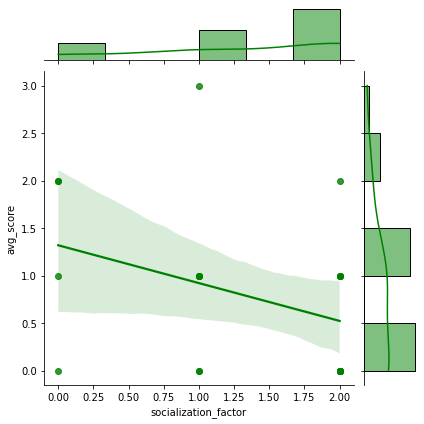

In [ ]:

sns.jointplot(x = "socialization_factor", y = "avg_score", data = df_numeric, kind = "reg",color="green");

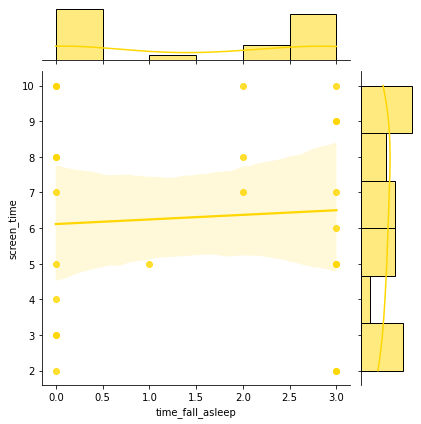

In [ ]:
sns.jointplot(x = "time_fall_asleep", y = "screen_time", data = df_numeric, kind = "reg",color="gold");